In [14]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import no
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (plot_corner, plot_chain, plot_fit, style, calculate_probs, get_params, get_initial_position_normal)

In [15]:
style()

In [16]:
zfiles = glob(join(root_dir, 'Data', 'Effective-Volume-no', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution-no', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(-0.10)_(0.10).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.10)_(0.16).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.16)_(0.20).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.20)_(0.23).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.23)_(0.26).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.26)_(0.28).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.28)_(0.30).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.30)_(0.32).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.32)_(0.34).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.34)_(0.36).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.36)_(0.37).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.37)_(0.39).hdf5',
  '

In [17]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [18]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
log_nu0 = [0]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
sigma1 = 5.
sigma2 = 10.
log_sigmaw = [np.log(sigma1)]
q_sigmaw = [sigma1/sigma2]
a1 = 0.9
a2 = 0.1
log_a = [np.log(a1)]
q_a = [a2/a1]

theta = np.array([rhob + sigmaz + log_nu0 + R + zsun + w0 + log_sigmaw + q_sigmaw + log_a + q_a]).flatten()
theta.shape

(32,)

In [19]:
locs_raw = dict(
    log_nu0=-1,
    R=3.4E-3,
    zsun=-100,
    w0=-15,
    log_sigmaw=np.log(1),
    q_sigmaw=0.,
    log_a=np.log(0.01),
    q_a=0.,
)

scales_raw = dict(
    log_nu0=3,
    R=0.6E-3,
    zsun=200,
    w0=15,
    log_sigmaw=np.log(50)-locs_raw['log_sigmaw'],
    q_sigmaw=1.,
    log_a=np.log(100)-locs_raw['log_a'],
    q_a=1.0
)

keys = list(locs_raw.keys())
locs = np.array(list(locs_raw.values()))
scales = np.array(list(scales_raw.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('log_nu0', -1.0, 0.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -100.0, 30.0, 100.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw', 0.0, 1.6094379124341003, 3.912023005428146),
 ('q_sigmaw', 0.0, 0.5, 1.0),
 ('log_a', -4.605170185988091, -0.10536051565782628, 4.605170185988093),
 ('q_a', 0.0, 0.11111111111111112, 1.0)]

In [20]:
ndim = len(locs)+24
nwalkers = 10*ndim+2
ndim, nwalkers

(32, 322)

In [21]:
p0 = no.generate_p0(nwalkers, locs, scales)
p0.shape

(322, 32)

In [22]:
for p in p0:
    print(no.log_prob(p, zdata, wdata, locs, scales))

(42.01615626728645, -2439.7229444068644)
(46.32972639763353, -409.0901568813516)
(37.66464629208486, -6084.217160541748)
(43.021368955999286, -147680.84452120675)
(39.19206979352624, -66809.99863832847)
(44.91703646128224, -135030.44710057837)
(44.2772249789067, -32010.15472792876)
(45.123910348843474, -25533.423745844226)
(46.23571401098651, -123805.53835083671)
(41.19193354575328, -8633084.364078349)
(42.06749748753637, -1133.1691875577521)
(41.187685040583034, -570474.8572608083)
(37.0577761681117, -1252.855848966504)
(46.41330193605079, -567.1531460243922)
(43.61664547353764, -40034.49666570162)
(34.29622606272591, -113021469.75198689)
(42.844063012608046, -1653959.0762239064)
(45.63288376166753, -990.1579548478294)
(48.48385149387266, -2959.931924631113)
(44.414487873418835, -1359211.6819563052)
(47.74532193706213, -217318.1915574353)
(41.566346662329515, -581.5851864129937)
(48.426421018388176, -1066973.645997001)
(40.47722959473006, -11323.3834142234)
(35.51922176746461, -37134.

In [23]:
p0_flat = p0.reshape(-1, ndim)
no.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.20161563e+01, -2.48173910e+03, -2.43972294e+03],
       [ 4.63297264e+01, -4.55419883e+02, -4.09090157e+02],
       [ 3.76646463e+01, -6.12188181e+03, -6.08421716e+03],
       [ 4.30213690e+01, -1.47723866e+05, -1.47680845e+05],
       [ 3.91920698e+01, -6.68491907e+04, -6.68099986e+04],
       [ 4.49170365e+01, -1.35075364e+05, -1.35030447e+05],
       [ 4.42772250e+01, -3.20544320e+04, -3.20101547e+04],
       [ 4.51239103e+01, -2.55785477e+04, -2.55334237e+04],
       [ 4.62357140e+01, -1.23851774e+05, -1.23805538e+05],
       [ 4.11919335e+01, -8.63312556e+06, -8.63308436e+06],
       [ 4.20674975e+01, -1.17523669e+03, -1.13316919e+03],
       [ 4.11876850e+01, -5.70516045e+05, -5.70474857e+05],
       [ 3.70577762e+01, -1.28991363e+03, -1.25285585e+03],
       [ 4.64133019e+01, -6.13566448e+02, -5.67153146e+02],
       [ 4.36166455e+01, -4.00781133e+04, -4.00344967e+04],
       [ 3.42962261e+01, -1.13021504e+08, -1.13021470e+08],
       [ 4.28440630e+01, -1.65400192e+06

(32,)


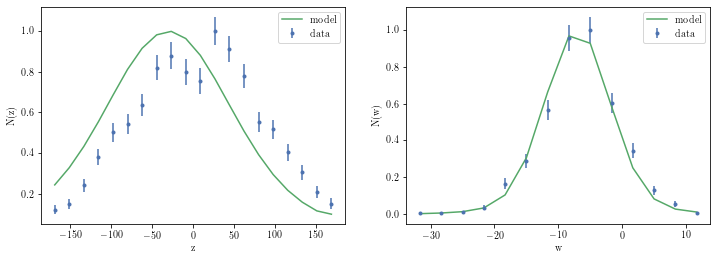

(55.30253043311484, -50.323805667134124)

In [24]:
print(theta.shape)
zmod = no.fz(zmid, theta)
wmod = no.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
no.log_prob(theta, zdata, wdata, locs, scales)

In [25]:
time0 = time()
for i in range(5):
    print("\t",i)
    t0 = time()
    chain = no.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
    print(time() - t0, "s")
    burn = 300
    keys, locs_normal, scales_normal = get_initial_position_normal(keys, chain[burn:], np.arange(24, 24+len(keys)))
    p0 = no.generate_p0(nwalkers, locs_normal, scales_normal, norm=True)
    t0 = time()
    chain = no.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
    print(time() - t0, "s")
    p0 = chain[-1]
print("total", time() - time0, "s")

	 0
12.89622688293457 s
12.773662567138672 s
	 1
12.779993057250977 s
12.767919301986694 s
	 2
12.841347932815552 s
12.769274473190308 s
	 3
12.863667249679565 s
12.8000168800354 s
	 4
12.67734432220459 s
12.78720760345459 s
total 128.11922883987427 s


In [26]:
calculate_probs(no, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[ 45.75022786,  46.37933568,  92.12956354],
       [ 43.22283393,  46.29051269,  89.51334662],
       [ 43.05154248,  35.03714942,  78.0886919 ],
       ...,
       [ 38.47845134,  62.56020795, 101.03865929],
       [ 42.87324102,  65.23233784, 108.10557886],
       [ 35.66015632,  65.39746248, 101.05761879]])

9it [00:01,  8.74it/s]


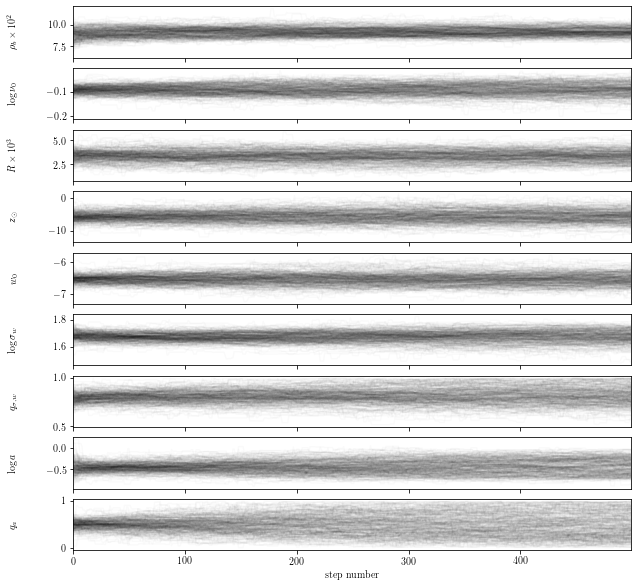

In [27]:
labels = [r'$\rho_b\times 10^2$', r'$\log \nu_0$', 
          r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', 
          r'$\log \sigma_{w}$', r'$q_{\sigma,w}$', r'$\log a$', r'$q_a$']
labs = ['rhob', 'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw', 'q_sigmaw', 'log_a', 'q_a']
indexes = [12] + list(range(24, len(labs)+23))

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10), alpha=0.02)

In [28]:
p0_next = chain[-1, :, :]
t0 = time()
chain = no.mcmc(2200, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

57.036343574523926 s


(2200, 322, 32)

9it [00:01,  8.56it/s]


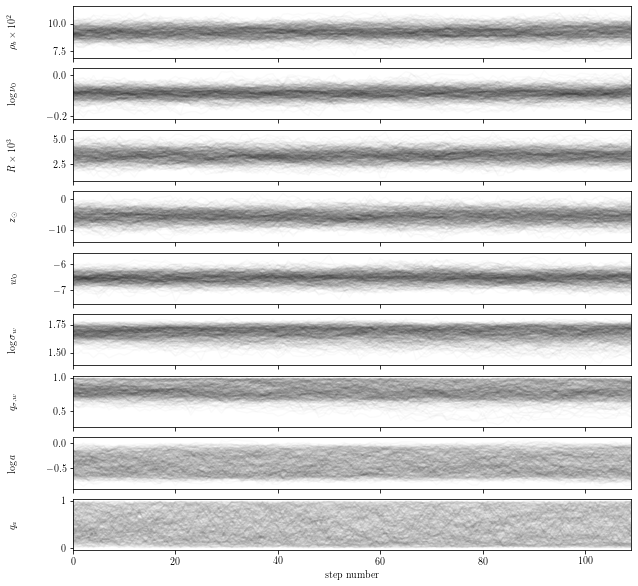

In [29]:
thin = 20
labels = [r'$\rho_b\times 10^2$', r'$\log \nu_0$', 
          r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', 
          r'$\log \sigma_{w}$', r'$q_{\sigma,w}$', r'$\log a$', r'$q_a$']
labs = ['rhob', 'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw', 'q_sigmaw', 'log_a', 'q_a']
indexes = [12] + list(range(24, len(labs)+23))
chain_thin = chain[::thin]
params = get_params(chain_thin, indexes, labs)
plot_chain(params, labels, figsize=(10,10), alpha=0.02)

In [33]:
chain_thin[40:].shape

(70, 322, 32)

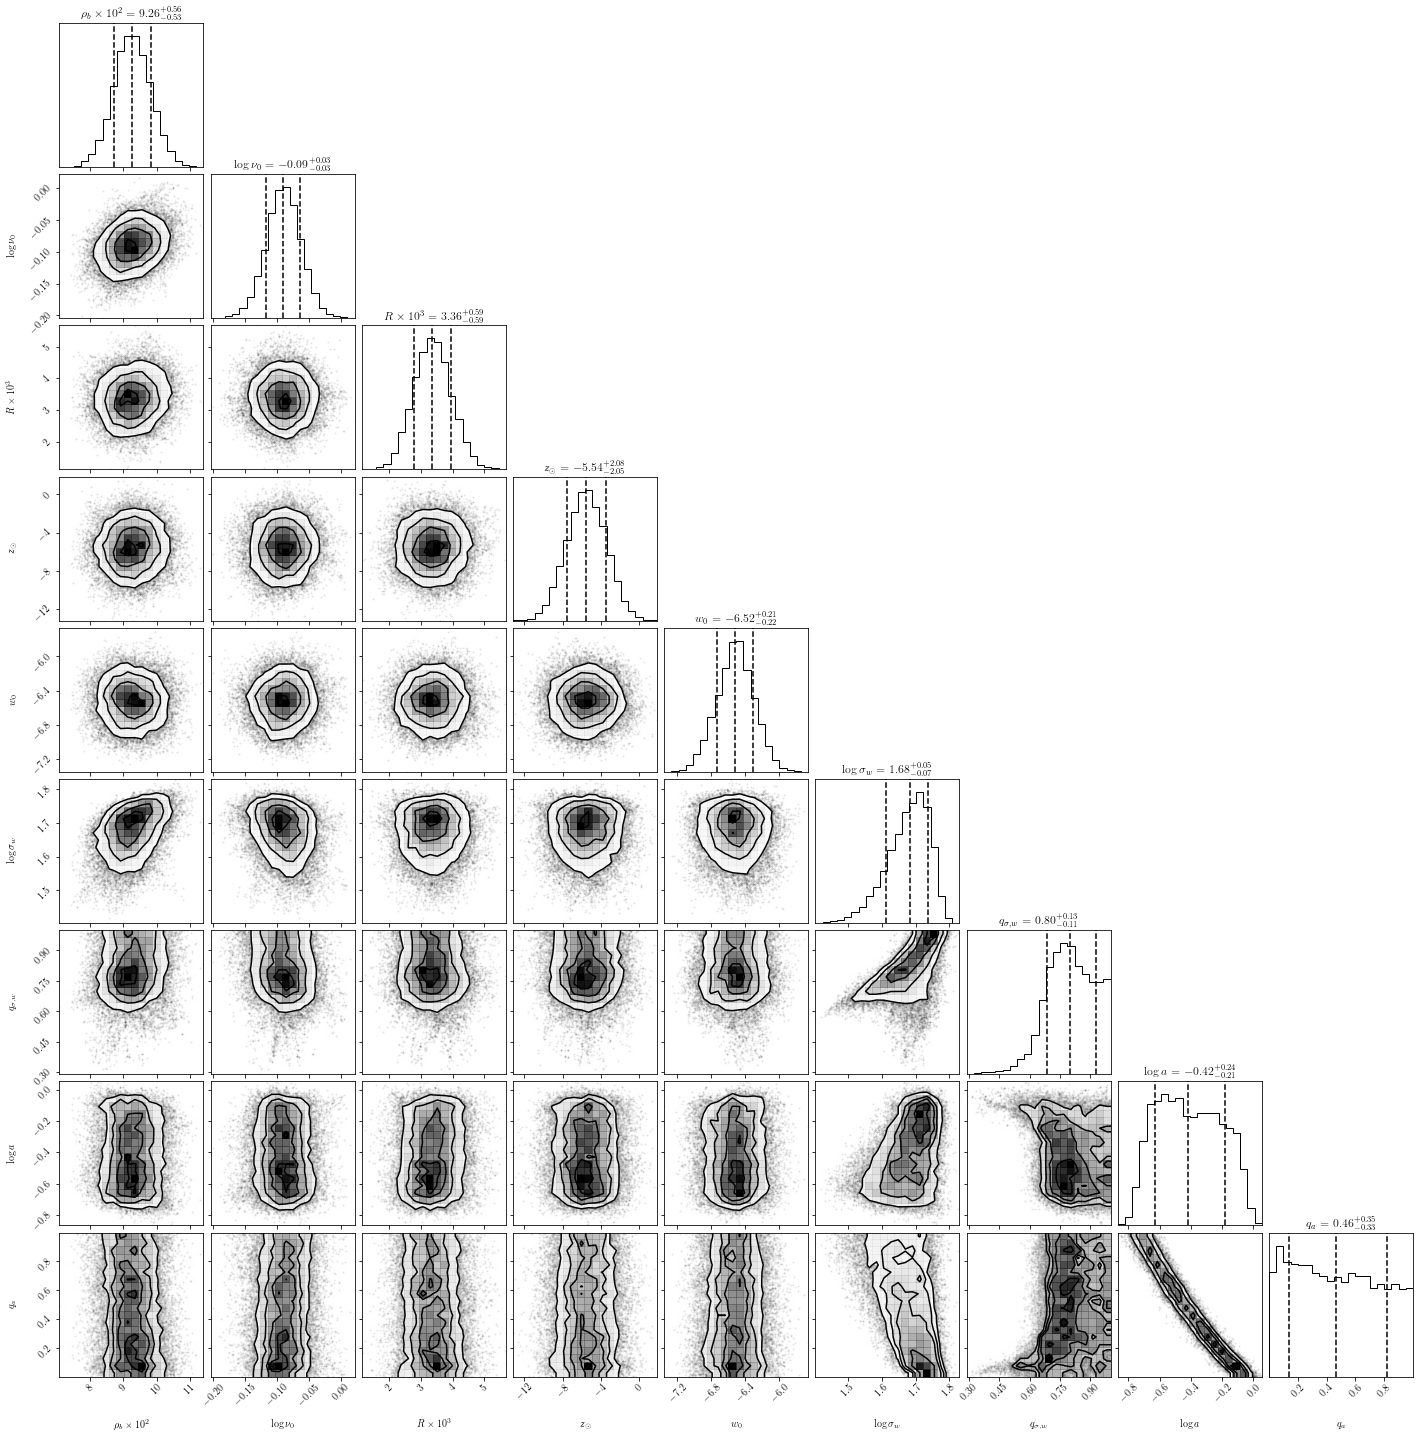

In [34]:
labels = [r'$\rho_b\times 10^2$', r'$\log \nu_0$', 
          r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', 
          r'$\log \sigma_{w}$', r'$q_{\sigma,w}$', r'$\log a$', r'$q_a$']
labs = ['rhob', 'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw', 'q_sigmaw', 'log_a', 'q_a']
indexes = [12] + list(range(24, len(labs)+23))
chain_thin = chain[::thin]

params = get_params(chain_thin[40:], indexes, labs)
plot_corner(params, labels)

(132000, 32)


100%|██████████| 50000/50000 [00:32<00:00, 1549.49it/s]


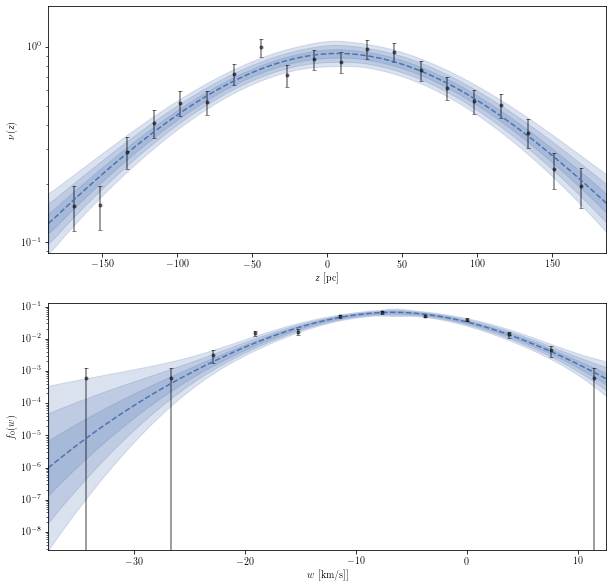

In [19]:
plot_fit(no, zdata, wdata, chain, ndim)

In [20]:
probs = calculate_probs(no, chain, ndim, zdata, wdata, locs, scales)

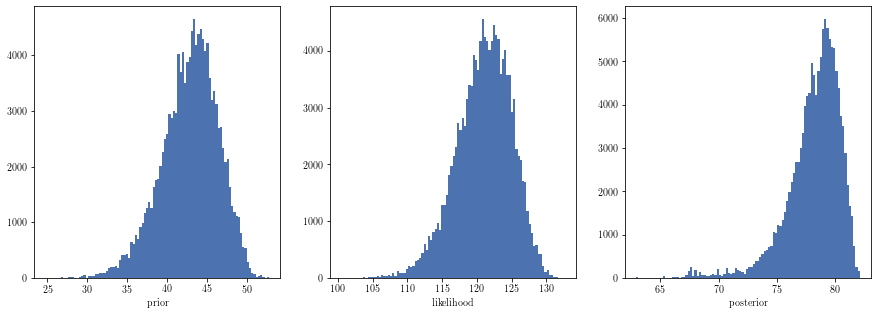

132.61113207047157

In [21]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

# educated initial guess!?!

check 1_mock_dm

# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

# Mock comparison

run mcmc but now for mock data comparison.

`Data/MCMC/dm_mock/mock/comp`

It contains mock data with different number of data points.
1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000

This comparison is done to see the prediction power of the model.

In [22]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import no
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)

In [23]:
from utils import style, calculate_probs, plot_chain, plot_corner, plot_fit, get_params

style()

In [24]:
zfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp','w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_50000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_500000.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/co

In [25]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [26]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
log_nu0 = [0]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.5)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.1)]

theta = np.array([rhob + sigmaz + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(32,)

In [27]:
locs = dict(
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('log_nu0', -1.0, 0.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 30.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, -0.6931471805599453, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -2.3025850929940455, 0.6931471805599454)]

(32,)


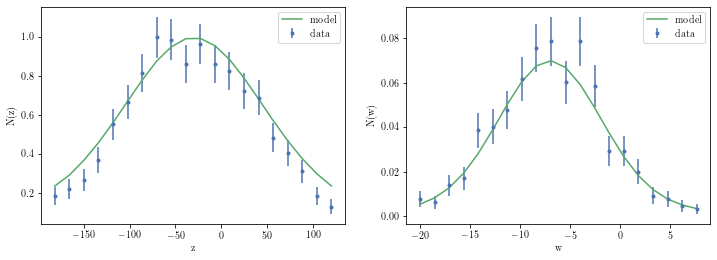

(54.63134921923049, 151.15555191900924)

In [28]:
print(theta.shape)
zmod = no.fz(zmid, theta)
wmod = no.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
no.log_prob(theta, zdata, wdata, locs, scales)

In [29]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(32, 66)

In [30]:
p0 = no.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(66, 32)

In [31]:
p0_flat = p0.reshape(-1, ndim)
no.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.46477676e+01, -1.85044194e+03, -1.80579417e+03],
       [ 4.48841923e+01, -1.82889378e+03, -1.78400958e+03],
       [ 4.26017891e+01, -3.11094010e+03, -3.06833831e+03],
       [ 4.20174944e+01, -4.12443552e+03, -4.08241803e+03],
       [ 4.15617413e+01, -2.21425363e+03, -2.17269189e+03],
       [ 4.35929582e+01, -1.25610330e+03, -1.21251034e+03],
       [ 4.03708578e+01, -8.58537274e+02, -8.18166416e+02],
       [ 4.24160531e+01, -1.23429726e+03, -1.19188121e+03],
       [ 4.59719219e+01, -1.61437255e+02, -1.15465333e+02],
       [ 4.65955930e+01, -1.76585708e+03, -1.71926149e+03],
       [ 4.60551434e+01, -2.67823792e+02, -2.21768648e+02],
       [ 4.58968139e+01, -1.14378633e+03, -1.09788952e+03],
       [ 4.46966675e+01, -6.00806892e+02, -5.56110225e+02],
       [ 4.24412113e+01, -3.75033102e+03, -3.70788981e+03],
       [ 4.67525806e+01, -9.08076248e+02, -8.61323667e+02],
       [ 3.99959438e+01, -1.05634595e+03, -1.01635001e+03],
       [ 4.90209503e+01, -3.89538980e+02

In [32]:
t0 = time()
chain = no.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

3.946843147277832 s


(500, 66, 32)

In [13]:
calculate_probs(no, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   44.57174918,  -759.3396411 ,  -714.76789192],
       [   42.61046932,  -375.65904243,  -333.04857311],
       [   35.17883963, -7057.81211632, -7022.63327669],
       ...,
       [   45.5281166 ,   101.75112554,   147.27924215],
       [   46.14243919,    99.84962405,   145.99206324],
       [   40.5243795 ,    94.26271193,   134.78709144]])

100%|██████████| 9/9 [00:00<00:00, 28.12it/s]


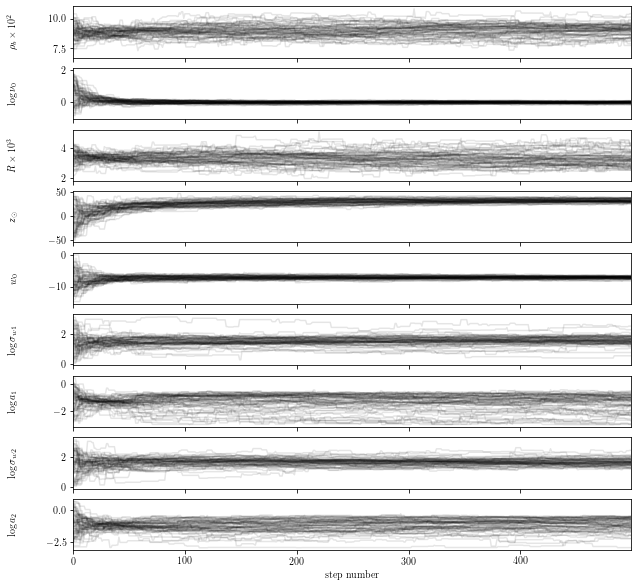

In [33]:
labels = [r'$\rho_b\times 10^2$',  r'$\log \nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob',  'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [34]:
p0_next = chain[-1, :, :]
t0 = time()
chain = no.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

15.257311582565308 s


(2000, 66, 32)

100%|██████████| 12/12 [00:00<00:00, 21.35it/s]


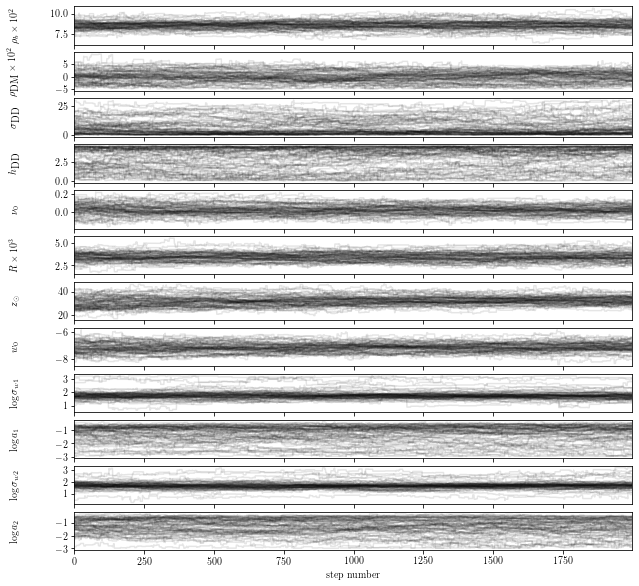

In [32]:
labels = [r'$\rho_b\times 10^2$',  r'$\log \nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob',  'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

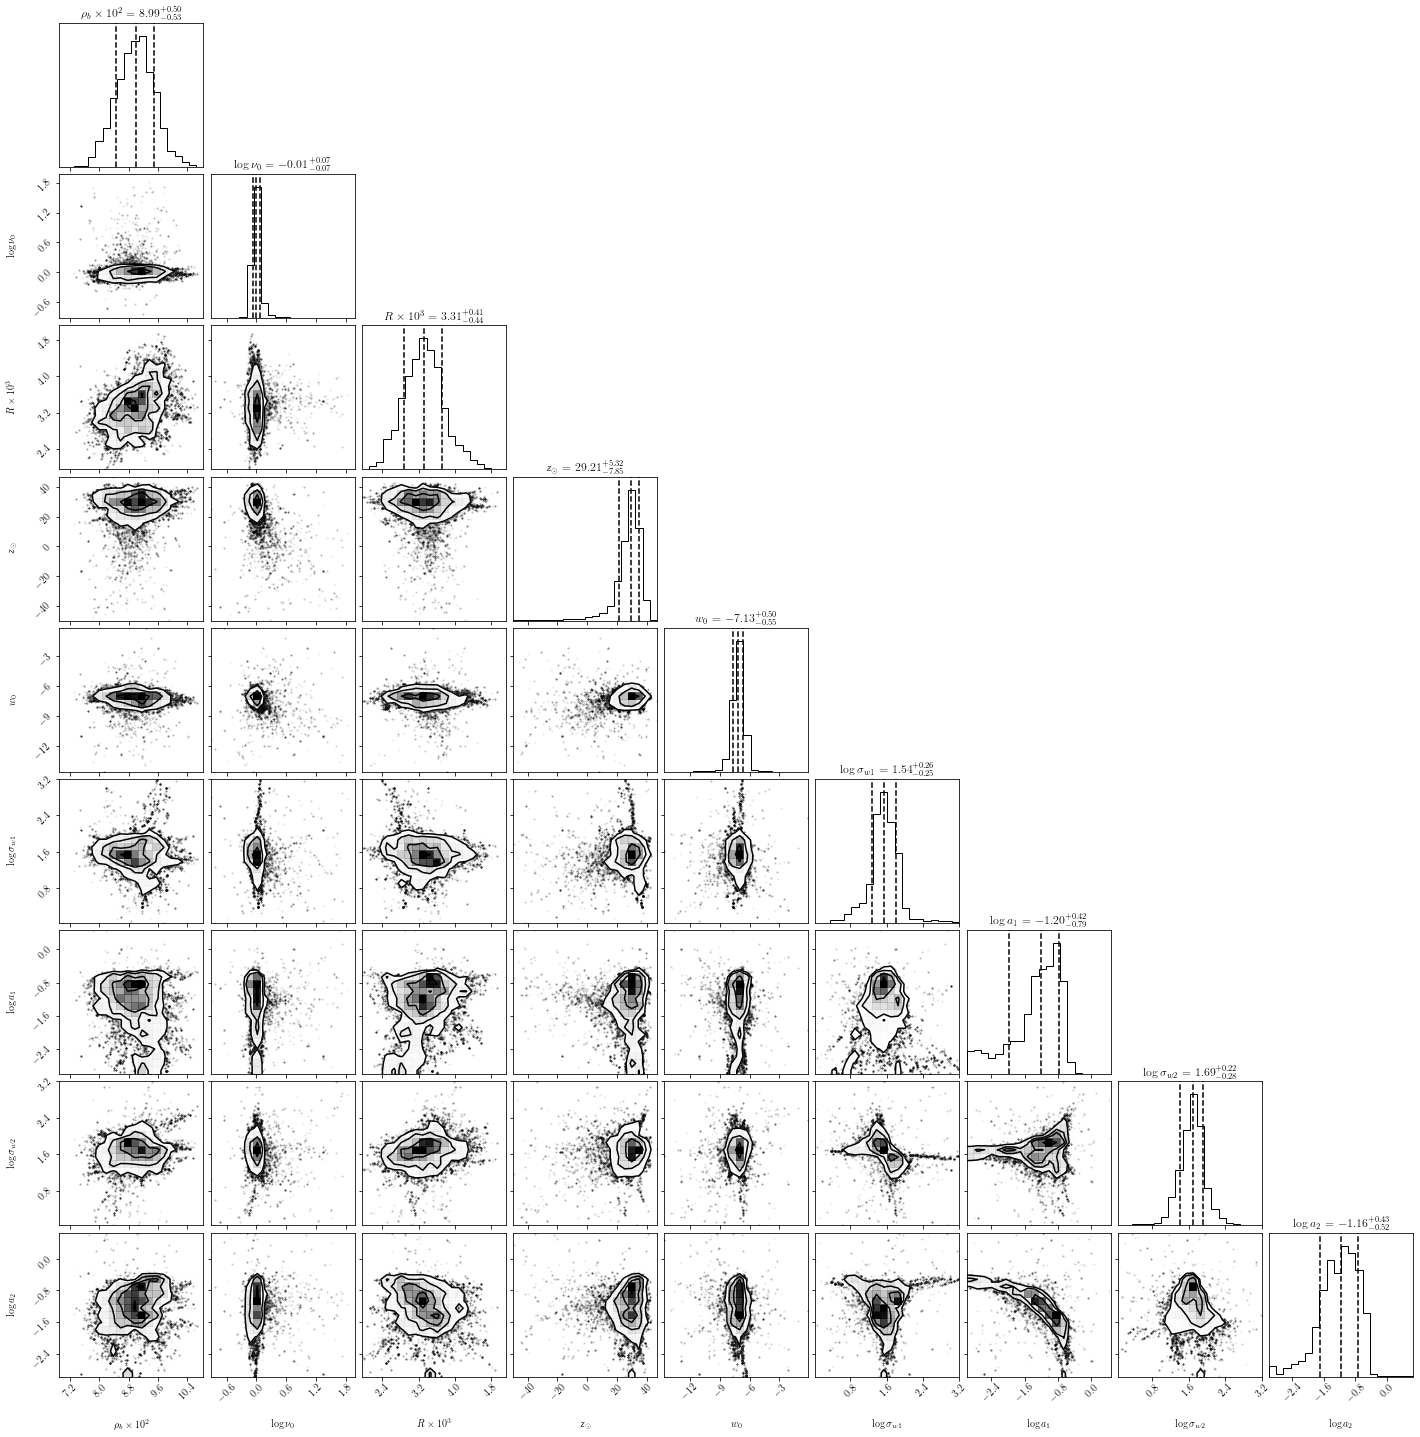

In [35]:
plot_corner(params, labels)

(132000, 32)


100%|██████████| 50000/50000 [00:37<00:00, 1335.55it/s]


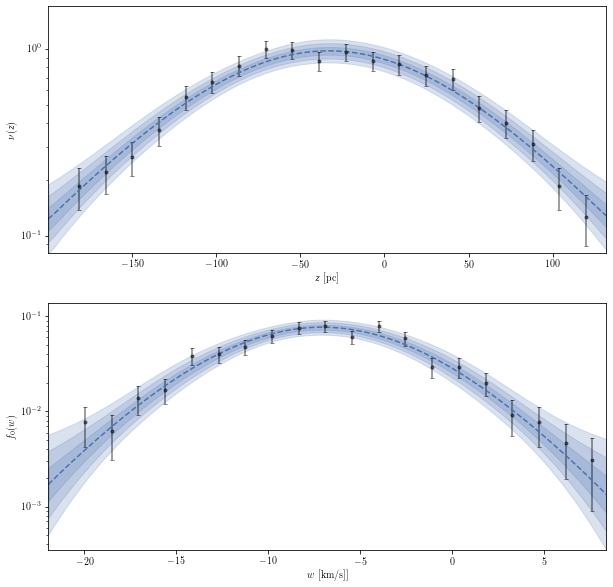

In [36]:
plot_fit(no, zdata, wdata, chain, ndim)

In [37]:
probs = calculate_probs(no, chain, ndim, zdata, wdata, locs, scales)

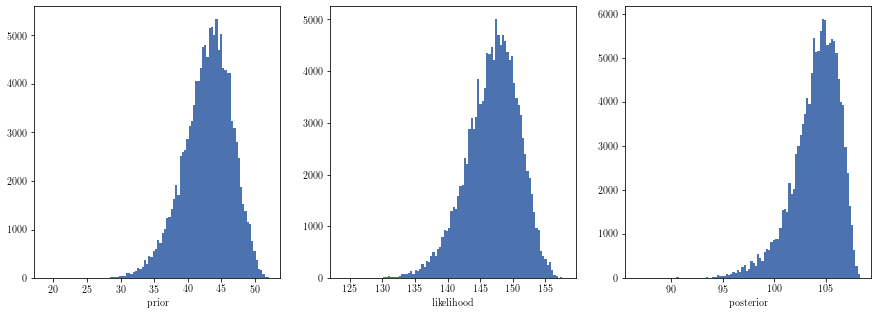

157.91845956653495

In [38]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

The script for comparing also implemented in `script` folder.